# Statistical numbers

For numerical variables it is useful to calculate
<ul>
    <li>the number of values</li>
    <li>mean (average)</li>
    <li>standard deviation</li>
    <li>descriptive statistical numbers (minimum, maximum, median and quartiles)</li>
</ul>

In [1]:
### First import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Different styles give different layouts.
### Styles available can be viewed with the command plt.style.available

plt.style.use('seaborn-whitegrid')

In [2]:
### Open the data

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### View the the first rows of the data.

df.head()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## describe() gives statistical numbers

In [3]:
df.describe()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [4]:
### Statistical numbers for chosen variables with two decimals

df1 = df[['age', 'empl_years', 'salary']].describe().round(2)

### We use the following names for statistical numbers

df1.index = ['Count', 'Mean', 'StDev', 'Min', 'Q1', 'Median', 'Q3', 'Max']

### Polish the titles

df1.columns = ['Age', 'Work years', 'Salary']

df1

,Age,Work years,Salary
Count,82.00,80.00,82.00
Mean,37.95,12.18,2563.88
StDev,9.77,8.81,849.35
Min,20.00,0.00,1521.00
Q1,31.00,3.75,2027.00
Median,37.50,12.50,2320.00
Q3,44.00,18.25,2808.00
Max,61.00,36.00,6278.00


In [5]:
### Statistical numbers for variables for satisfactions

df2 = df[['management', 'colleagues', 'environment', 'salary_level', 'duties']].describe()

### In the following the result is ordered by the mean in descending order.

df2 = df2.sort_values(by = 'mean', axis = 1, ascending = False)

### Let's view the result.

df2

,colleagues,environment,duties,management,salary_level
count,81.000000,82.000000,82.000000,82.000000,82.000000
mean,4.061728,3.219512,3.195122,3.060976,2.109756
std,0.826826,1.154961,1.047502,1.058155,1.111179
min,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
### Let's continue polishing the table above.
### In the following we give new names for the headers.

headers = ['Colleagues, n=' + str(int(df2.loc[('count', 'colleagues')])), 
            'Work environment, n=' + str(int(df2.loc[('count', 'environment')])),
           'Work duties, n=' + str(int(df2.loc[('count', 'duties')])),
           'Management, n=' + str(int(df2.loc[('count', 'management')])),
           'Salary, n=' + str(int(df2.loc[('count', 'salary_level')]))
          ]

### Define the columns be thepreviousdefined.

df2.columns = headers

### View the result

df2


,"Colleagues, n=81","Work environment, n=82","Work duties, n=82","Management, n=82","Salary, n=82"
count,81.000000,82.000000,82.000000,82.000000,82.000000
mean,4.061728,3.219512,3.195122,3.060976,2.109756
std,0.826826,1.154961,1.047502,1.058155,1.111179
min,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


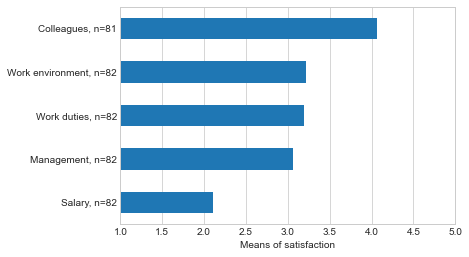

In [7]:
### We now express means as a bar chart in descending order by the means.

df2.loc['mean'].sort_values().plot.barh()

### And some polishing
### Give names to the horicontal axis and also set limits to the x-axis.

plt.xlabel('Means of satisfaction')
plt.xlim(1, 5)

### The style seaborn-whitegrid includes both vertical and horisontal gridlines. 
### In this chart we only want to use vertical dridlines.

plt.grid(axis = 'y')

## Making use of the library Seaborn 

(1.0, 5.0)

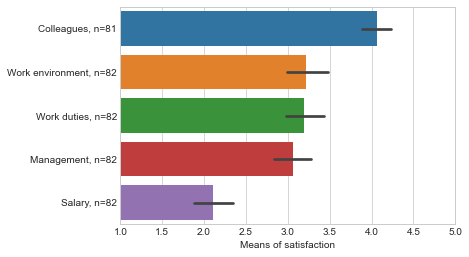

In [8]:
### In the following we express satisfaction means as barplot charts of the seaborn library.
### Barplot charts also include error margins for the means.

### It is enough to define data = df, if the order of bars is not relevant.
### The parameter orient = 'h' stands for horisontal bars. Why not try other choices yourself!

sns.barplot(data = df[['colleagues', 'environment', 'duties', 'management', 'salary_level']], orient ='h')

plt.xlabel('Means of satisfaction')
plt.yticks(ticks = [0, 1, 2, 3, 4], labels = headers)

### Set the limits of the horisontal axis to 1-5 

plt.xlim(1,5)

Text(0.5, 0, 'Monthly salary, n=82')

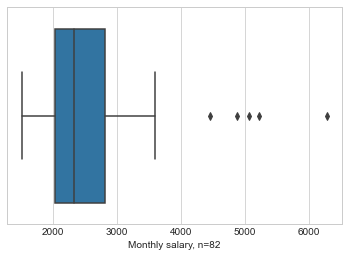

In [9]:
### We now show overview of descriptive statistical numbers (min, max, median, quartiles) as a boxplot of the seaborn library.
### Values that are considerebly different from other values are expressed as isolated points.

sns.boxplot(x = df['salary'])

plt.xlabel('Monthly salary, n=' + str(df['salary'].count()))

([<matplotlib.axis.YTick at 0x218156fa488>,
 [Text(0, 0, 'Colleagues, n=81'),
  Text(0, 1, 'Work environment, n=82'),
  Text(0, 2, 'Work duties, n=82'),
  Text(0, 3, 'Management, n=82'),
  Text(0, 4, 'Salary, n=82')])

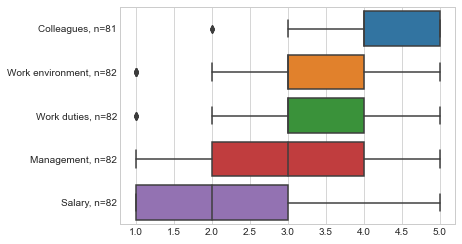

In [10]:
### We draw the summary of descriptive statistical numbers of satisfaction variables as boxplot chart.
### Using the parameter data several variables can be included in one boxplot.

sns.boxplot(data = df[['colleagues', 'environment', 'duties', 'management', 'salary_level']], orient ='h')

plt.yticks(ticks= [0, 1, 2, 3, 4], labels = headers)


### Further information

<ul><li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html</a></li>
<li><a href ="https://seaborn.pydata.org/generated/seaborn.barplot.html">https://seaborn.pydata.org/generated/seaborn.barplot.html</a></li>
<li><a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">https://seaborn.pydata.org/generated/seaborn.boxplot.html</a></li>    
</ul>

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>